<a href="https://colab.research.google.com/github/ehestir/ES292_F25/blob/main/ES292_f25_Fraud_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection: Data Sleuthing

Context: You are provided with three datasets (`Dataset_A.csv`, `Dataset_B.csv`, `Dataset_C.csv`) representing environmental monitoring of algal growth. Each dataset may reflect plausible science, fraudulent manipulation, or biased selection. Your task is to detect irregularities and assess how effect size is impacted.


## Step 1. Load the Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np

In [12]:
dfAurl = 'https://github.com/ehestir/ES292_F25/raw/refs/heads/main/Dataset_A.csv'
dfA = pd.read_csv(dfAurl) # Dataset is now stored in a Pandas Dataframe
#print(dfA) #I like printing for sanity checking

In [13]:
dfBurl = 'https://github.com/ehestir/ES292_F25/raw/refs/heads/main/Dataset_B.csv'
dfB = pd.read_csv(dfBurl)
dfCurl = 'https://github.com/ehestir/ES292_F25/raw/refs/heads/main/Dataset_C.csv'
dfC = pd.read_csv(dfCurl)

## Step 2. Explore Relationships

For each dataset:
1. Compute **Pearson correlation (r)** between `fertilizer_input_kg_ha` and `algal_index`.

2. Compute Cohen's d (for corelations)

3. Fit a linear regression: `algal_index ~ fertilizer_input_kg_ha + temp_C`

Below is some code for the first dataset to get you started

Pearson r = 0.677, p = 1.958e-17
r² (variance explained by fertilizer alone) = 0.459
                            OLS Regression Results                            
Dep. Variable:            algal_index   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     62.48
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           3.47e-19
Time:                        22:02:11   Log-Likelihood:                -419.77
No. Observations:                 120   AIC:                             845.5
Df Residuals:                     117   BIC:                             853.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

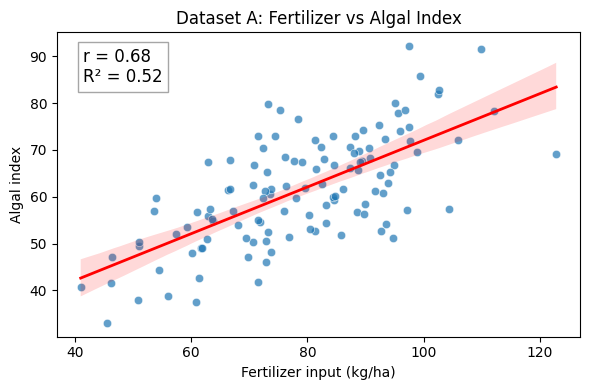

In [14]:
# -----------------------------
# 1. Compute Pearson correlation
# -----------------------------
r, pval = pearsonr(dfA["fertilizer_input_kg_ha"], dfA["algal_index"])
print(f"Pearson r = {r:.3f}, p = {pval:.3e}")

# r² from correlation
r2 = r**2
print(f"r² (variance explained by fertilizer alone) = {r2:.3f}")

# -----------------------------
# 2. Fit OLS regression (fertilizer + temp → algal_index)
# -----------------------------
X = dfA[["fertilizer_input_kg_ha", "temp_C"]]
X = sm.add_constant(X)   # add intercept
y = dfA["algal_index"]

model = sm.OLS(y, X).fit()
print(model.summary())

print(f"Regression R² (fertilizer + temp) = {model.rsquared:.3f}")

# ------------------------------
# 3. Cohen’s d equivalent for Pearson r
# Formula: d = 2r / sqrt(1 - r^2)
# ------------------------------
d = (2 * r) / np.sqrt(1 - r**2)
print(f"Cohen's d equivalent (for r) = {d:.3f}")

# -----------------------------
# 4. Scatterplot with regression line
# -----------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="fertilizer_input_kg_ha",
    y="algal_index",
    data=dfA,
    alpha=0.7
)
sns.regplot(
    x="fertilizer_input_kg_ha",
    y="algal_index",
    data=dfA,
    scatter=False,
    color="red",
    line_kws={"lw":2}
)

# Add annotation with r and R²
plt.text(
    0.05, 0.95,
    f"r = {r:.2f}\nR² = {model.rsquared:.2f}",
    transform=plt.gca().transAxes,
    ha="left", va="top", fontsize=12,
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray")
)

plt.title("Dataset A: Fertilizer vs Algal Index")
plt.xlabel("Fertilizer input (kg/ha)")
plt.ylabel("Algal index")
plt.tight_layout()
plt.show()

## Step 3. Look for Red Flags

- Do the decimals look suspicious (e.g., only .0 or .5)?
- Are there duplicated rows?
- Are outliers missing or “trimmed away”?
- Is the effect size (r, R²) unusually high compared to the noise you expect in environmental systems?

## Step 3. Group Discussion

1. Which dataset looks most plausible, and why?

2. Which dataset(s) might involve fraudulent manipulation?

3. How do effect sizes differ across the datasets?

4. Would a peer reviewer catch this?

5. How could open data/code reduce opportunities for fraud?